<a href="https://colab.research.google.com/github/GreenOrange44/AIR/blob/main/HandsOn/BankNoteProject/BankNoteProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Custom data CNN**

We create different folder of each class of images. (Class means the things the neural network will differentiate to)

In [ ]:
# data is avialable in MMBM_Bank.zip

In [ ]:
#We mount the drive as our data is stored in our drive

from google.colab import drive
drive.mount('/content/gdrive')



Mounted at /content/gdrive


In [ ]:
!ls
#this gives all the list of folders of current directory

gdrive	sample_data


In [ ]:
# it changes the directory
%cd /content/gdrive/MyDrive/AIR2024/CNN

/content/gdrive/MyDrive/AIR2024/CNN


In [ ]:
!pwd
# it prints the working directory

/content/gdrive/MyDrive/AIR2024/CNN


In [ ]:

!ls

BankNoteProject.ipynb  images  model_re  test_dec


In [ ]:
dataset_path="images/"
model_path="bank_note_recognition_dec.model"
plot_path="plot.png"



In [ ]:
# import the necessary packages
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import img_to_array
from keras.utils import to_categorical
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import cv2
import os


In [ ]:
# initialize the number of epochs to train for, initial learning rate,
# and batch size
EPOCHS = 25
INIT_LR = 1e-3
BS = 32


In [ ]:
class LeNet:
  @staticmethod
  def build(width, height, depth, classes):
    # initialize the model
    model = Sequential()
    inputShape = (height, width, depth)


    # if we are using "channels first", update the input shape
    if K.image_data_format() == "channels_first":
      inputShape = (depth, height, width)


    # first set of CONV => RELU => POOL layers
    model.add(Conv2D(20, (5, 5), padding="same",
      input_shape=inputShape))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))


    # second set of CONV => RELU => POOL layers
    model.add(Conv2D(50, (5, 5), padding="same"))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))


    # first (and only) set of FC => RELU layers
    model.add(Flatten())
    model.add(Dense(500))
    model.add(Activation("relu"))


    # softmax classifier
    model.add(Dense(classes))
    model.add(Activation("softmax"))


    # return the constructed network architecture
    return model


In [ ]:
# initialize the data and labels
print("[INFO] loading images...")
data = []
labels = []


# grab the image paths and randomly shuffle them
imagePaths = sorted(list(paths.list_images(dataset_path)))
random.seed(42)
random.shuffle(imagePaths)


# loop over the input images
for imagePath in imagePaths:
    # load the image, pre-process it, and store it in the data list
    print(f"Processing image: {imagePath}")
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (28, 28))
    image = img_to_array(image)
    data.append(image)


    # extract the class label from the image path and update the labels list
    label = imagePath.split(os.path.sep)[-2]
    #print(f"Extracted label: {label}")
    label = 1 if label == "inr10" else 0
    #print(f"Assigned numeric label: {label}")
    labels.append(label)


# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)


[INFO] loading images...
Processing image: images/inr10/aug_814.jpg
Processing image: images/inr100/aug_52.jpg
Processing image: images/inr10/aug_529.jpg
Processing image: images/inr10/aug_825.jpg
Processing image: images/inr100/aug_553.jpg
Processing image: images/inr100/aug_35.jpg
Processing image: images/inr100/aug_227.jpg
Processing image: images/inr100/aug_488.jpg
Processing image: images/inr10/aug_173.jpg
Processing image: images/inr100/aug_96.jpg
Processing image: images/inr100/aug_621.jpg
Processing image: images/inr100/aug_392.jpg
Processing image: images/inr100/aug_119.jpg
Processing image: images/inr10/aug_905.jpg
Processing image: images/inr10/aug_792.jpg
Processing image: images/inr100/aug_230.jpg
Processing image: images/inr100/aug_85.jpg
Processing image: images/inr100/aug_913.jpg
Processing image: images/inr100/aug_157.jpg
Processing image: images/inr100/aug_510.jpg
Processing image: images/inr10/aug_997.jpg
Processing image: images/inr10/aug_811.jpg
Processing image: i

[INFO] compiling model...


[INFO] training network...
Epoch 1/25
46/46 [==============================] - 8s 53ms/step - loss: 0.1987 - accuracy: 0.9074 - val_loss: 6.4058e-09 - val_accuracy: 1.0000
Epoch 2/25
46/46 [==============================] - 1s 22ms/step - loss: 3.0354e-08 - accuracy: 1.0000 - val_loss: 1.7758e-09 - val_accuracy: 1.0000
Epoch 3/25
46/46 [==============================] - 1s 21ms/step - loss: 2.1403e-08 - accuracy: 1.0000 - val_loss: 1.6635e-09 - val_accuracy: 1.0000
Epoch 4/25
46/46 [==============================] - 1s 21ms/step - loss: 2.2503e-08 - accuracy: 1.0000 - val_loss: 1.5631e-09 - val_accuracy: 1.0000
Epoch 5/25
46/46 [==============================] - 1s 22ms/step - loss: 2.3044e-08 - accuracy: 1.0000 - val_loss: 1.4502e-09 - val_accuracy: 1.0000
Epoch 6/25
46/46 [==============================] - 1s 21ms/step - loss: 1.9216e-08 - accuracy: 1.0000 - val_loss: 1.3567e-09 - val_accuracy: 1.0000
Epoch 7/25
46/46 [==============================] - 1s 22ms/step - loss: 1.7765e-08

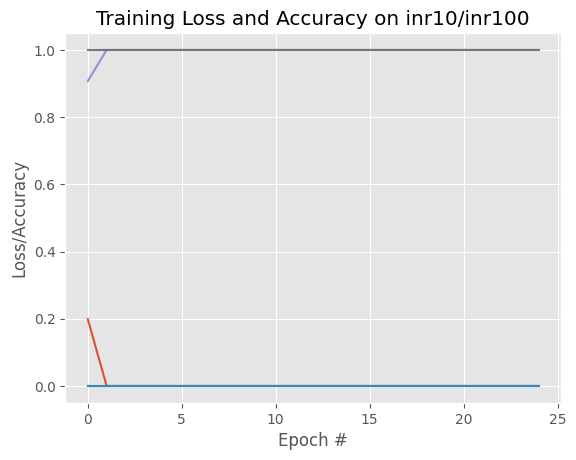

In [ ]:
# partition the data into training and testing splits using 75% of the data for training and the remaining 25% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25, random_state=42)


# convert the labels from integers to vectors
trainY = to_categorical(trainY, num_classes=2)
testY = to_categorical(testY, num_classes=2)


# construct the image generator for data augmentation
aug = ImageDataGenerator(rotation_range=30, width_shift_range=0.1,
                         height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
                         horizontal_flip=True, fill_mode="nearest")


# initialize the model
print("[INFO] compiling model...")
model = LeNet.build(width=28, height=28, depth=3, classes=2)
opt = Adam(lr=INIT_LR)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])


# train the network
print("[INFO] training network...")
H = model.fit(aug.flow(trainX, trainY, batch_size=BS),
              validation_data=(testX, testY), steps_per_epoch=len(trainX) // BS,
              epochs=EPOCHS, verbose=1)


# save the model to disk
print("[INFO] serializing network...")
model.save(model_path)


# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
N = EPOCHS
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on inr10/inr100")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
#plt.legend(loc="lower left")
plt.savefig(plot_path)







[INFO] loading network...
1/1 [==============================] - 0s 257ms/step
Label: 10 Rs, with Prob: 99.83%


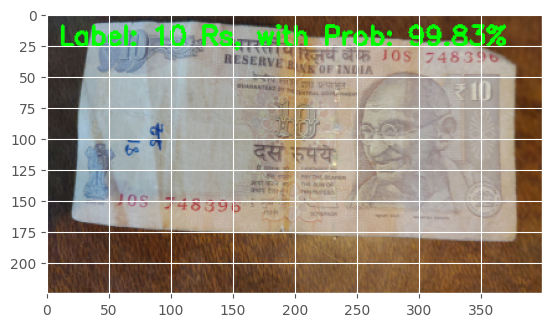

In [ ]:
# testing phase
image_path = "test_dec/img2.jpg" # use 2, 3 or 4 instead of 1 for different test image
model_path = "bank_note_recognition_dec.model"
#we already stored our model to the above location so we are accessing it

# import the necessary packages
from tensorflow.keras.utils import img_to_array
from keras.models import load_model
import numpy as np
import cv2
import imutils


# load the image
image = cv2.imread(image_path)
orig = image.copy()


# pre-process the image for classification
image = cv2.resize(image, (28, 28))
image = image.astype("float") / 255.0 #normalising
image = img_to_array(image) #single column
image = np.expand_dims(image, axis=0)


# load the trained convolutional neural network stored in the path
print("[INFO] loading network...")
model = load_model(model_path)


# classify the input image
(inr100, inr10) = model.predict(image)[0]


# build the label
label = "Label: 10 Rs, with Prob" if inr10 > inr100 else "Label: 100 Rs, with Prob"
proba = inr10 if inr10 > inr100 else inr100
label = "{}: {:.2f}%".format(label, proba * 100)
print(label)


plt.figure()
# draw the label on the image
output = imutils.resize(orig, width=400)
cv2.putText(output, label, (10, 25), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)


# show the output image
img2 = output[:, :, ::-1]
plt.imshow(img2)





# **Transfer Learning**

It uses already created CNN that is proven to be really good. We load that network and use all the layers (called freezing the layers) expect few then if we want we can add some of our own. We usually just tweak the output layer so the results are as what we expect.
It's far more efficient than customly creating CNN.

 **Well i did some projects using transfer learning on Kaggle, see it**